## NK model

I did not finish the NK model. Also I've noted that I get strange IRFs for the RBC with capital but I'm not sure why is that.


## RBC Problem

# Households

Households maximize utility subject to their budget constraint:

$$ \max \beta^t [\dfrac{c_t^{1-\gamma}}{1-\gamma}-{l_t^{1-\nu}}{1-\nu}]$$ 
    
Subject to 

$$ c_t + k_{t} = w_t l_t + k_{t-1} r_t + k_{t-1} (1-\delta) $$

The first order conditions are:
$$
[c] c_t^{-\gamma}=\lambda_t \\
[l]l_t^\nu=\lambda_t w_t \\
[k_{t+1}]\lambda_t=\beta (r_{t+1}+(1-\delta))\lambda_{t+1}
$$

Which give us the Euler equation and the labor-leisure equaiton:
$$
[Euler] c_t^{-\gamma}=\beta (1+r_{t+1}-\delta)c_{t+1}^{-\gamma} \\
[L-L] l_t^\nu=c_t^{-\delta} w_t 
$$

If we log-linearize it:
$$
[Euler] -\gamma \hat{c}_t = - \gamma \hat{c}_{t+1} + (1-\beta(1-\delta)) \hat{r}_{t+1}\\
[L-L] \hat{w}_t = \nu \hat{l}_t + \gamma \hat{c}_t
$$

Finally we also need to add the log-linearized law of motion of capital:
$$ \hat{k}_t=(1-\delta) \hat{k}_{t-1} + \delta \hat{i}_t $$



# Firm Problem
The production function takes the form $y=z k^\alpha l^{1-\alpha}$. Assuming the factor markets are competitive $w$ and $r$ will be the marginal productivity of labor and capital, which log-linearizing give us:

$$ 
[y] \hat{y}_t = \hat{z}_t + \alpha \hat{k}_{t-1} + (1-\alpha) \hat{l}_t \\ 
[r] \hat{r}_t = \hat{z}_t + (\alpha-1) \hat{k}_{t-1} + (1-\alpha) \hat{l}_t \\ 
[w] \hat{w}_t = \hat{z}_t + \alpha \hat{k}_{t-1} - (1-\alpha) \hat{l}_t
$$



# Market Clearing Conditions

Total output has to be equal to consumption plus investment then
$$ \hat{y}_t = s_c \hat{c}_t + s_i \hat{i}_t $$


# DAG

For the DAG I will move the Euler condition to the market clearing conditions. My unknown variables will be the choice of capital and labor for period t, and the diagram will be the following:



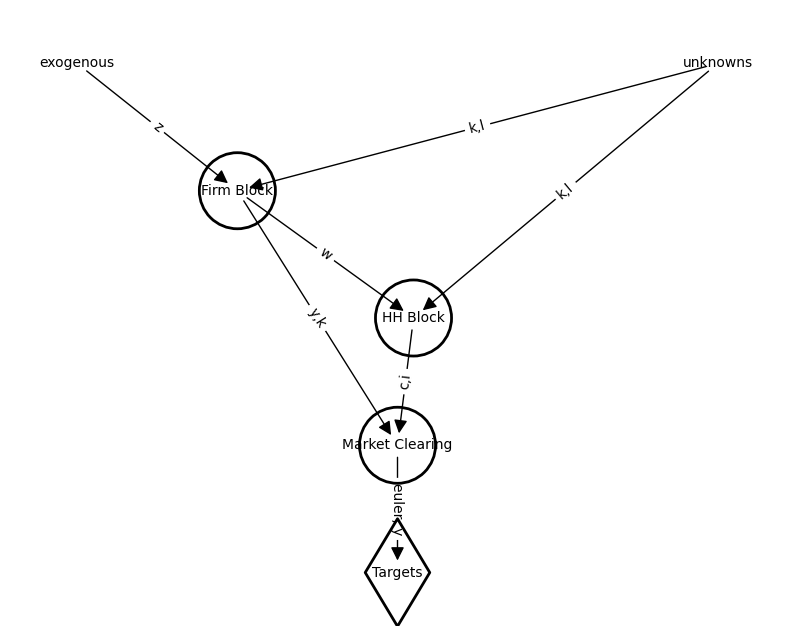

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions to control layout
positions = {
    'A': (0.95, 4),  # exogenous
    'B': (1.05, 4),  # unknowns
    'C': (0.975, 3),    # Firm Block
    'D': (1.0025, 2),    # HH Block
    'E': (1, 1),    # Market Clearing
    'F': (1, 0),    # Output node
}

# Add nodes with labels
G.add_node('A', label='exogenous', shape='z')
G.add_node('B', label='unknowns', shape='l,k')
G.add_node('C', label='Firm Block', shape='o')
G.add_node('D', label='HH Block', shape='o')
G.add_node('E', label='Market Clearing', shape='o')
G.add_node('F', label='Targets', shape='d')

# Add edges with labels
edges = [
    ('A', 'C', 'z'),
    ('B', 'C', 'k,l'),
    ('C', 'D', 'w'),
    ('B', 'D', 'k,l'),
    ('C', 'E', 'y,k'),
    ('D', 'E', 'c,i'),
    ('E', 'F', 'euler, y')
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Draw the graph
plt.figure(figsize=(10, 8))

# Define custom node shapes and draw them
node_shapes = {'s': 's', 'o': 'o', 'd': 'd'}
for shape in node_shapes:
    nx.draw_networkx_nodes(
        G, positions,
        nodelist=[node for node in G.nodes() if G.nodes[node]['shape'] == shape],
        node_shape=node_shapes[shape],
        node_size=3000,
        edgecolors='black',  # No filling
        linewidths=2,
        node_color='none'    # No fill color
    )

# Draw edges with labels
nx.draw_networkx_edges(G, positions, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, positions, labels=nx.get_node_attributes(G, 'label'), font_size=10)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels)

# Hide axis
plt.axis('off')
plt.show()


# Solving RBC
We want to clear markets at all points in time:

$$
H = \begin{pmatrix}
 - \hat{y}_0 + s_c \hat{c}_0 + s_i \hat{i}_0 \\
  \cdot \cdot \cdot \\
 - \hat{y}_T + s_c \hat{c}_T + s_i \hat{i}_T \\
  \gamma (\hat{c}_{1} - \hat{c}_0 ) - (1-\beta(1-\delta)) \hat{r}_{0} \\
  \cdot \cdot \cdot \\
  \gamma (\hat{c}_{T} - \hat{c}_{T-1} ) - (1-\beta(1-\delta)) \hat{r}_{T-1}
\end{pmatrix}
= \begin{pmatrix}
-\hat{y}+\phi_{prod,c}\hat{c} + \phi_{prod,i}\hat{i} \\
\phi_{eul,c}\hat{c} + \phi_{eul,r}\hat{r} 
\end{pmatrix}
$$

Now to take the derivatives of $H$ with respect to the unknowns, we take derivatives of each one of the endogenous variables with respect to the unknowns and then aggregate the results.

$$
H_U= H = \begin{pmatrix}
 -I_T &  \phi_{prod,c} &  \phi_{prod,i} & 0 & 0 \\
 0 & \phi_{eul,c} & 0 & \phi_{eul,r}&  0
\end{pmatrix}
\begin{pmatrix}
\dfrac{\partial y}{\partial k} & \dfrac{\partial y}{\partial l} \\
\dfrac{\partial c}{\partial k} & \dfrac{\partial c}{\partial l} \\
\dfrac{\partial i}{\partial k} & \dfrac{\partial i}{\partial l} \\
\dfrac{\partial r}{\partial k} & \dfrac{\partial r}{\partial l} \\
\dfrac{\partial w}{\partial k} & \dfrac{\partial w}{\partial l}
\end{pmatrix}
$$

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, hstack, vstack, issparse
from scipy.sparse.linalg import spsolve

#Parameters
gamma = 1
alpha = 0.33
beta = 0.95
delta = 0.025
sc = 0.8
nu=1
rho=0.9
T = 100

I = sp.sparse.eye(T)
Ip1 = sp.sparse.diags([np.ones(T-1)], [1], (T, T))
Im1 = sp.sparse.diags([np.ones(T-1)], [-1], (T, T))
Z = sp.sparse.csr_matrix((T, T))

In [2]:
# First I generate H_Y
phi_prod_c=sc*I
phi_prod_i=(1-sc)*I
phi_eul_c=gamma * Ip1 - gamma * I
phi_eul_r=-(1-beta*(1-delta)) *I


HY= sp.sparse.bmat([[-I,phi_prod_c,phi_prod_i,Z,Z],
                   [Z,phi_eul_c,Z,phi_eul_r,Z]])
#HY=vstack([hstack([-I,phi_prod_c,phi_prod_i,Z,Z]), hstack([Z,phi_eul_c,Z,phi_eul_r,Z])])

#dy/DU
dydk=alpha*Im1
dydl=(1-alpha)*I

#dr/DU
drdk= (alpha-1) *Im1
drdl= (1-alpha) *I

#dw/DU
dwdk= alpha *I
dwdl=-alpha*Ip1

#dc/DU
dcdk= 1/gamma * dwdk
dcdl= - nu/gamma * I + 1/gamma * dwdl

#di/DU
didk=1/delta*I-(1-delta)/delta*Im1
didl= Z

YU= sp.sparse.bmat([[dydk, dydl],
                    [dcdk, dcdl],
                    [didk, didl],
                    [drdk, drdl],
                    [dwdk, dwdl],])

#YU=hstack([vstack([dydk, dcdk, didk, drdk, dwdk]),  vstack([dydl, dcdl, didl, drdl, dwdl]) ])

assert HY.shape == (2*T, 5*T)
assert YU.shape == (5*T, 2*T)

HU= HY*YU



In [3]:
#import scipy.sparse as sp
# Check if HU is sparse
#is_sparse = sp.issparse(HU)

#print("Is HU sparse?", is_sparse)

In [4]:
#Now we find HZ
dydz = I
drdz = Ip1
dwdz = I

dcdz= 1/gamma * dwdz
didz= Z

YZ= sp.sparse.bmat ([[dydz], 
                     [dcdz], 
                     [didz], 
                     [drdz], 
                     [dwdz]])

assert YZ.shape == (5*T, 1*T)

#YZ=vstack([dydz, dcdz, didz, drdz, dwdz])
           
           
HZ = HY*YZ

#Generate the productivity shift
dz = np.zeros(T)
dz[0] = 1
for i in range(1, T):
    dz[i] = rho * dz[i - 1]

dYdz = (YU*spsolve(HU, HZ)+YZ)



C:\Users\fpern\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:395: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
C:\Users\fpern\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


(500,)


Text(0.5, 1.0, 'Wage')

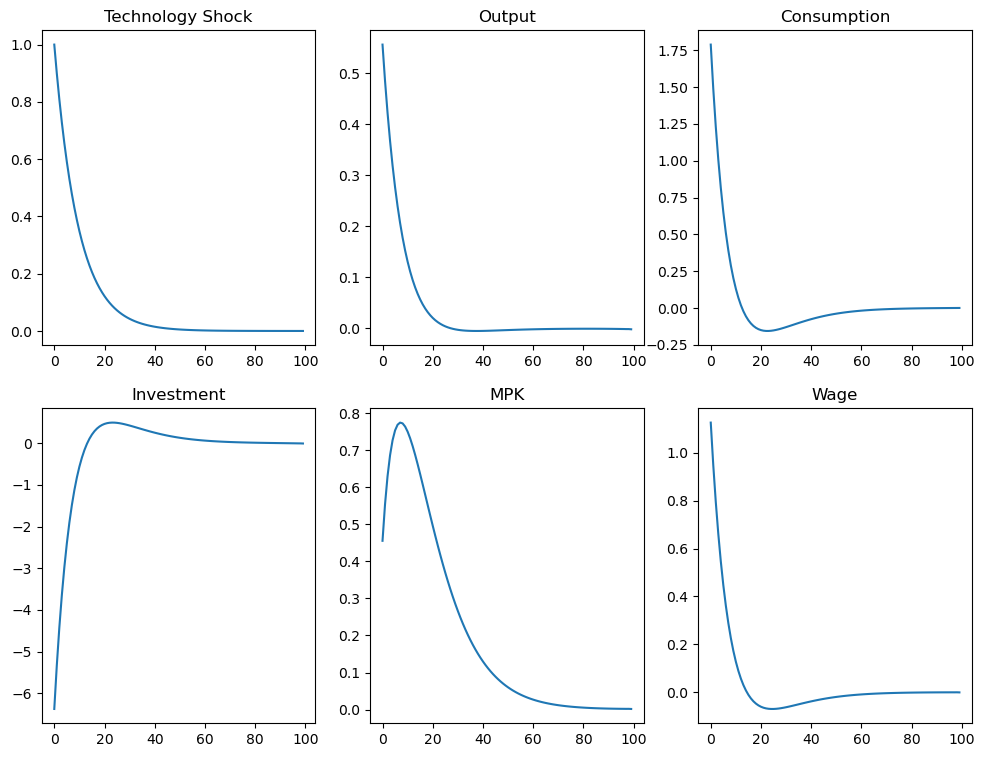

In [5]:
 # compute impulse response functions
 X = dYdz @ dz
 print(X.shape)
# unpack X into its components k,n,c,inv,y,wp,rk
y = X[0:T]
c = X[T:2*T]
inv = X[2*T:3*T]
r = X[3*T:4*T]
w = X[4*T:5*T]
    
# plot impulse response functions
fig, ax = plt.subplots(2, 3, figsize=(12, 9))
ax[0, 0].plot(dz, label='a')
ax[0, 0].set_title('Technology Shock')
ax[0, 1].plot(y, label='y')
ax[0, 1].set_title('Output')
ax[0, 2].plot(c, label='c')
ax[0, 2].set_title('Consumption')
ax[1, 0].plot(inv, label='inv')
ax[1, 0].set_title('Investment')
ax[1, 1].plot(r, label='r')
ax[1, 1].set_title('MPK')
ax[1, 2].plot(w, label='w')
ax[1, 2].set_title('Wage')
#plt.savefig('neoclassicalIRFs.png')

# RBC without capital

To simplify the problem I impose no savings in this economy. This implies that the euler equation will dissapear from our equilibrium conditions, as agents only care about their period-by-period choices of labor-consumption. 

The economy will be described by the following:

# Households

Households maximize utility subject to their budget constraint:

$$ \max \beta^t [\dfrac{c_t^{1-\gamma}}{1-\gamma}-{l_t^{1-\nu}}{1-\nu}]$$ 
    
Subject to 

$$ c_t = w_t l_t $$

The first order conditions are:
$$
[c] c_t^{-\gamma}=\lambda_t \\
[l]l_t^\nu=\lambda_t w_t \\
$$

Which give us the labor-leisure equaiton:
$$
[L-L] l_t^\nu=c_t^{-\delta} w_t 
$$

If we log-linearize it:
$$
[L-L] \hat{w}_t = \nu \hat{l}_t + \gamma \hat{c}_t
$$


# Firm Problem
The production function takes the form $y=z l$. Assuming the factor markets are competitive $w$ be the marginal productivity of labor, which log-linearizing give us:

$$ 
[y] \hat{y}_t = \hat{z}_t + \hat{l}_t \\ 
[w] \hat{w}_t = \hat{z}_t
$$



# Market Clearing Conditions

Total output has to be equal to consumption plus investment then
$$ \hat{y}_t = \hat{c}_t $$


# DAG

The diagram will be the following:


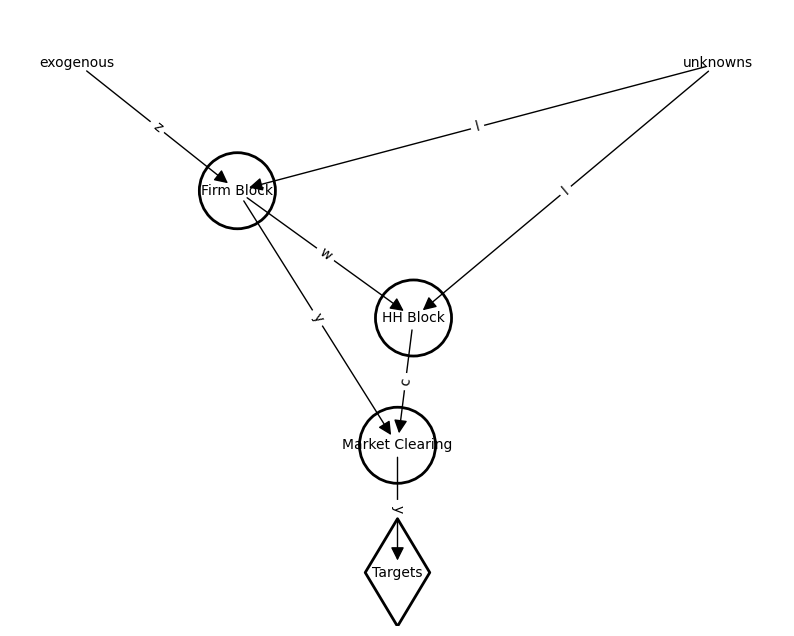

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions to control layout
positions = {
    'A': (0.95, 4),  # exogenous
    'B': (1.05, 4),  # unknowns
    'C': (0.975, 3),    # Firm Block
    'D': (1.0025, 2),    # HH Block
    'E': (1, 1),    # Market Clearing
    'F': (1, 0),    # Output node
}

# Add nodes with labels
G.add_node('A', label='exogenous', shape='z')
G.add_node('B', label='unknowns', shape='l')
G.add_node('C', label='Firm Block', shape='o')
G.add_node('D', label='HH Block', shape='o')
G.add_node('E', label='Market Clearing', shape='o')
G.add_node('F', label='Targets', shape='d')

# Add edges with labels
edges = [
    ('A', 'C', 'z'),
    ('B', 'C', 'l'),
    ('C', 'D', 'w'),
    ('B', 'D', 'l'),
    ('C', 'E', 'y'),
    ('D', 'E', 'c'),
    ('E', 'F', 'y')
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Draw the graph
plt.figure(figsize=(10, 8))

# Define custom node shapes and draw them
node_shapes = {'s': 's', 'o': 'o', 'd': 'd'}
for shape in node_shapes:
    nx.draw_networkx_nodes(
        G, positions,
        nodelist=[node for node in G.nodes() if G.nodes[node]['shape'] == shape],
        node_shape=node_shapes[shape],
        node_size=3000,
        edgecolors='black',  # No filling
        linewidths=2,
        node_color='none'    # No fill color
    )

# Draw edges with labels
nx.draw_networkx_edges(G, positions, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, positions, labels=nx.get_node_attributes(G, 'label'), font_size=10)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels)

# Hide axis
plt.axis('off')
plt.show()


In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, hstack, vstack
from scipy.sparse.linalg import spsolve

#Parameters
gamma = 1
alpha = 0
beta = 0.95
delta = 0.025
sc = 0.8
nu=1
rho=0.9
T = 100

I = sp.sparse.eye(T)
Ip1 = sp.sparse.diags([np.ones(T-1)], [1], (T, T))
Im1 = sp.sparse.diags([np.ones(T-1)], [-1], (T, T))
Z = sp.sparse.csr_matrix((T, T))

In [8]:
# First I generate H_Y
phi_prod_c=sc*I
phi_prod_i=(1-sc)*I

HY= sp.sparse.bmat([[-I,phi_prod_c,Z]])

#dy/DU
dydl=(1-alpha)*I

#dw/DU
dwdl=-alpha*Ip1

#dc/DU
dcdl= - nu/gamma * I + 1/gamma * dwdl


YU= sp.sparse.bmat([[ dydl],
                    [ dcdl],
                    [ dwdl],])

#YU=hstack([vstack([dydk, dcdk, didk, drdk, dwdk]),  vstack([dydl, dcdl, didl, drdl, dwdl]) ])

assert HY.shape == (1*T, 3*T)
assert YU.shape == (3*T, 1*T)

HU= HY*YU

In [9]:
#Now we find HZ
dydz = I
dwdz = I
dcdz= 1/gamma * dwdz

YZ= sp.sparse.bmat ([[dydz], 
                     [dcdz], 
                     [dwdz]])

assert YZ.shape == (3*T, 1*T)
           
           
HZ = HY*YZ

#Generate the productivity shift
dz = np.zeros(T)
dz[0] = 1
for i in range(1, T):
    dz[i] = rho * dz[i - 1]

dYdz = (YU*spsolve(HU, HZ)+YZ)




(300,)


Text(0.5, 1.0, 'Wage')

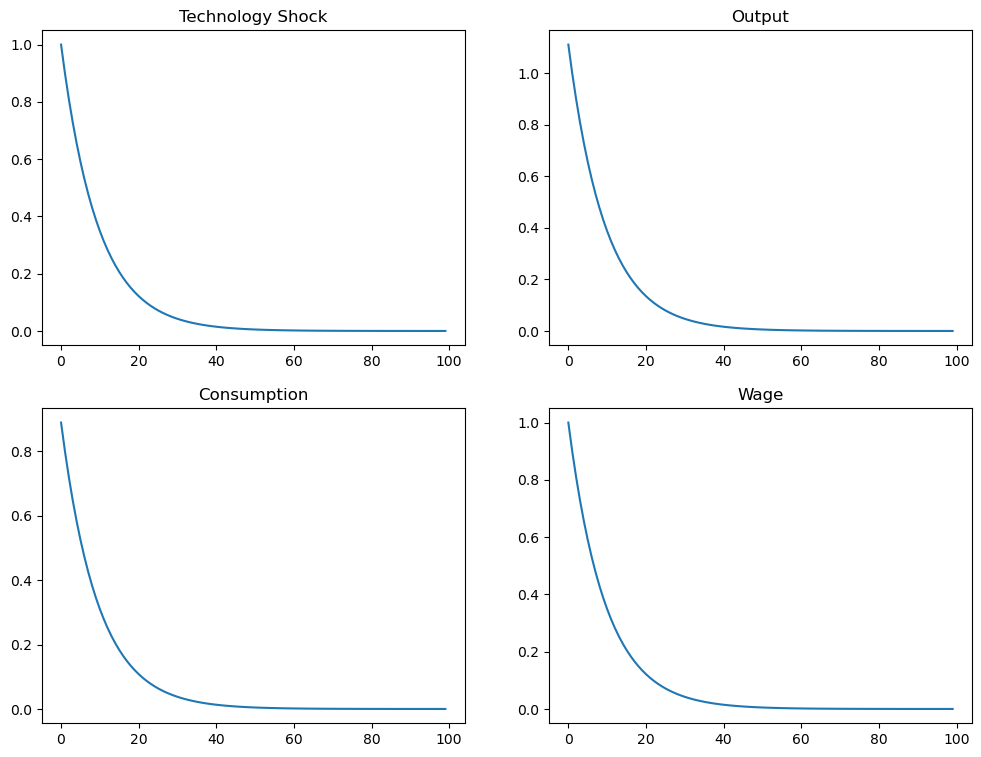

In [12]:
 # compute impulse response functions
 X = dYdz @ dz
 print(X.shape)
# unpack X into its components k,n,c,inv,y,wp,rk
y = X[0:T]
c = X[T:2*T]
w = X[2*T:3*T]
    
# plot impulse response functions
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0, 0].plot(dz, label='a')
ax[0, 0].set_title('Technology Shock')
ax[0, 1].plot(y, label='y')
ax[0, 1].set_title('Output')
ax[1, 0].plot(c, label='c')
ax[1, 0].set_title('Consumption')
ax[1, 1].plot(w, label='w')
ax[1, 1].set_title('Wage')
#plt.savefig('neoclassicalIRFs.png')